In [76]:
# cal f1_score
TP = 255
TN = 20
FP = 1380
FN = 45
f1_score = 2 * (((TP / (TP + FP)) * (TP / (TP + FN))) / ((TP / (TP + FP)) + (TP / (TP + FN))))
f1_score

0.2635658914728682

In [77]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

In [78]:
grid = pd.read_csv('Data_for_UCI_named.csv')
grid.drop(columns='stab', inplace=True)
grid.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


Split the data into an 80-20 train-test split with a random state of “1”. Use the standard scaler to transform the train set (x_train, y_train) and the test set (x_test). Use scikit learn to train a random forest and extra trees classifier. And use xgboost and lightgbm to train an extreme boosting model and a light gradient boosting model. Use random_state = 1 for training all models and evaluate on the test set. Answer the following questions:

In [79]:
features = grid.drop(columns='stabf')
target = grid['stabf']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

In [80]:
# Instantiate
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [81]:
# Instantiate14
rfc = RandomForestClassifier(random_state=1)

# fit to data
rfc.fit(X_train_transformed, y_train)

# predict
rfc_pred = rfc.predict(X_test_transformed)

# Accuracy score
rfc_accuracy = accuracy_score(y_true=y_test, y_pred=rfc_pred)
print(f'RandomForestClassifier Model Accuracy score: {rfc_accuracy}')

RandomForestClassifier Model Accuracy score: 0.929


In [82]:
# convert ['unstable', 'stable'] to [0, 1]
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

# Instantiate
xgb_clf = xgb.XGBClassifier()

# fit to data
xgb_clf.fit(X_train_transformed, y_train)

# predict
xgb_clf_pred = xgb_clf.predict(X_test_transformed)

# Accuracy score
xgb_clf_accuracy = accuracy_score(y_true=y_test, y_pred=xgb_clf_pred)
print(f'XGBoost Model Accuracy score: {round(xgb_clf_accuracy, 4)}')

XGBoost Model Accuracy score: 0.9455


In [83]:
# Instantiate16
lgb_clf = lgb.LGBMClassifier(random_state=1)

# fit to data
lgb_clf.fit(X_train_transformed, y_train)

# predict
lgb_clf_pred = lgb_clf.predict(X_test_transformed)

# Accuracy score
lgb_clf_accuracy = accuracy_score(y_true=y_test, y_pred=lgb_clf_pred)
print(f'LightGBM Model Accuracy score: {round(lgb_clf_accuracy, 4)}')

LightGBM Model Accuracy score: 0.9395


17Using the ExtraTreesClassifier as your estimator with cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1 and random_state = 1. What are the best hyperparameters from the randomized search CV?

In [84]:
# Instantiate
etc = ExtraTreesClassifier(random_state=1)

# fit to data
etc.fit(X_train_transformed, y_train)

# predict
etc_pred = etc.predict(X_test_transformed)

# Accuracy score
etc_accuracy = accuracy_score(y_true=y_test, y_pred=etc_pred)
print(f'ExtraTreesClassifier Model Accuracy score: {round(etc_accuracy, 4)}')

ExtraTreesClassifier Model Accuracy score: 0.928


In [85]:
# options in the question parameers
n_estimators = [100, 500, 1000, 300]
min_samples_split = [7, 2, 2, 5]
min_samples_leaf = [4, 8, 7, 6]
max_features = ['auto', 'log2', None]

hyperparameter = {'n_estimators': n_estimators, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_features': max_features}


randomcv = RandomizedSearchCV(etc,hyperparameter, cv=5, n_iter=10, scoring='accuracy', n_jobs=-1, verbose=1, random_state=1)

# fit 
searchcv = randomcv.fit(X_train_transformed, y_train)

# best hyperparameters from the randomized search CV
searchcv.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_features': None}

Train a new ExtraTreesClassifier Model with the new Hyperparameters from the RandomizedSearchCV (with random_state = 1). Is the accuracy of the new optimal model higher or lower than the initial ExtraTreesClassifier model with no hyperparameter tuning?

In [86]:
# new model with hyperparameter tuning
# Instatiate
etcc = ExtraTreesClassifier(max_features=None,min_samples_leaf=8, min_samples_split=2, n_estimators=1000, random_state=1)

# fit to data
etcc.fit(X_train_transformed, y_train)

# predict
etcc_pred = etcc.predict(X_test_transformed)

# Accuracy score
etcc_accuracy = accuracy_score(y_true=y_test, y_pred=etcc_pred)
print(f'ExtraTreesClassifier Model Accuracy score: {round(etcc_accuracy, 4)}')

ExtraTreesClassifier Model Accuracy score: 0.927


Find the feature importance using the optimal ExtraTreesClassifier model. Which features are the most and least important respectively?

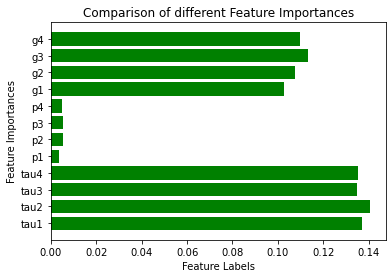

In [87]:
# Computing the importance of each feature
feature_importance = etcc.feature_importances_
# Plotting a Bar Graph
plt.barh(features.columns, feature_importance, color='g')
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()